### Simple Linear Regression
* Given a collection of values representing an **independent variable** (the month/year combination) and a **dependent variable** (the average high temperature for that month/year), simple linear regression describes the relationship between these variables with a straight line, known as the **regression line**

In [27]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
print(temp)

     Date Submitted    Workout Date     Activity Type  Calories Burned (kCal)  \
0      May 11, 2022    May 11, 2022               Run                     656   
1       May 9, 2022     May 9, 2022               Run                     391   
2       May 8, 2022     May 8, 2022               Run                     313   
3       May 7, 2022     May 7, 2022               Run                     348   
4       May 7, 2022     May 7, 2022               Run                     430   
..              ...             ...               ...                     ...   
659    May 13, 2019    May 13, 2019  Indoor Run / Jog                     191   
660   Oct. 19, 2016   Oct. 19, 2016     Class Workout                     186   
661   Oct. 12, 2016   Oct. 12, 2016     Class Workout                     183   
662  Sept. 26, 2016  Sept. 26, 2016     Class Workout                     186   
663   Aug. 12, 2016   Aug. 12, 2016     Class Workout                     189   

     Distance (mi)  Workout

In [28]:
import pandas as pd
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)

In [30]:
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
mean_value = temp['Avg_Heart_Rate'].mean()
temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

step_value = temp['Steps'].mean()
temp['Steps'].fillna(value = step_value, inplace = True)

temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   664 non-null    datetime64[ns]
 1   Workout_Date     664 non-null    datetime64[ns]
 2   Activity_Type    664 non-null    object        
 3   Calories_Burned  664 non-null    int64         
 4   Distance         664 non-null    float64       
 5   Workout_Time     664 non-null    int64         
 6   Avg_Pace         664 non-null    float64       
 7   Max_Pace         664 non-null    float64       
 8   Avg_Speed        664 non-null    float64       
 9   Max_Speed        664 non-null    float64       
 10  Avg_Heart_Rate   664 non-null    float64       
 11  Steps            664 non-null    float64       
 12  Notes            664 non-null    object        
 13  Source           664 non-null    object        
 14  Link             664 non-null    object   

In [34]:
temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd.dropna()
upd3 = upd2[upd2['Avg_Pace'] > 7]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Max_Pace'], ascending=True)
upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd5[upd5['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60
df.count()

C:\Users\coleb\AppData\Local\Temp\ipykernel_14240\327151144.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculated'] = df['Workout_Time'] / 60


Date_Submitted     488
Workout_Date       488
Activity_Type      488
Calories_Burned    488
Distance           488
Workout_Time       488
Avg_Pace           488
Max_Pace           488
Avg_Speed          488
Max_Speed          488
Avg_Heart_Rate     488
Steps              488
Calculated         488
dtype: int64

In [35]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])

df.sort_values(by=['Workout_Date'], ascending=False)

C:\Users\coleb\AppData\Local\Temp\ipykernel_14240\2119545426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11,2022-05-11,Run,656,5.00,2989,9.96,1.08,6.03,55.39,146.00,7917.0,49.816667
1,2022-05-09,2022-05-09,Run,391,3.11,1802,9.66,0.94,6.21,64.11,140.00,4782.0,30.033333
2,2022-05-08,2022-05-08,Run,313,2.35,1376,9.74,1.03,6.16,58.29,156.00,3622.0,22.933333
3,2022-05-07,2022-05-07,Run,348,2.59,1516,9.75,0.43,6.16,140.98,154.00,4043.0,25.266667
4,2022-05-07,2022-05-07,Run,430,3.10,1974,10.61,0.00,5.65,0.00,105.74,5197.0,32.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2019-07-04,2019-07-04,Run,156,1.53,816,8.88,0.99,6.76,60.91,159.00,2215.0,13.600000
621,2019-07-02,2019-07-02,Run,95,1.02,552,9.02,0.34,6.65,174.52,148.00,1439.0,9.200000
626,2019-06-29,2019-06-29,Run,118,1.27,693,9.13,3.32,6.57,18.06,150.00,1824.0,11.550000
656,2019-05-19,2019-05-19,Run,419,3.11,2197,11.69,2.06,5.13,29.17,139.00,5295.0,36.616667


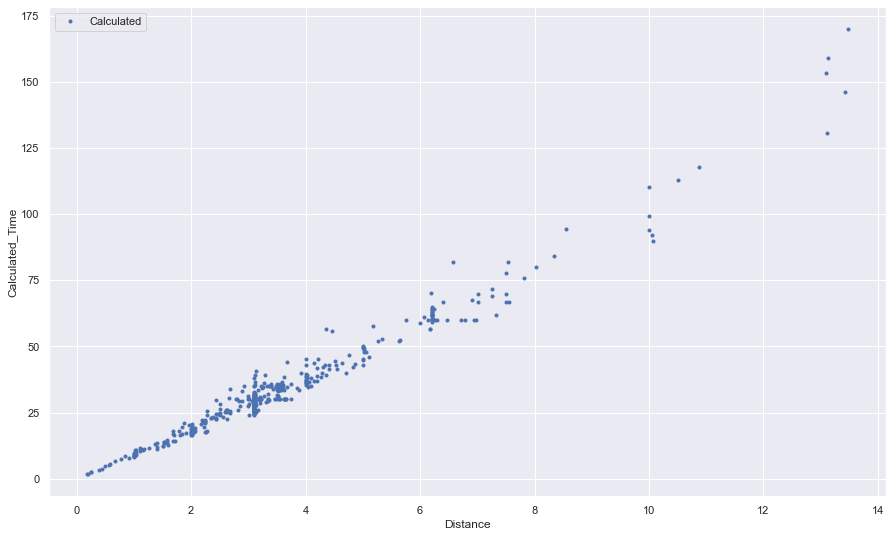

In [36]:

axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [37]:
from scipy import stats

In [38]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [39]:
linear_regression.slope

0.09152314014681963

In [40]:
linear_regression.intercept

0.4187949048721977

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [41]:
#The average temperature in New York was just under 40 this year, so pretty close
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.617748040795535


In [42]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1989531359233372


### Plotting the Average High Temperatures and a Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [43]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.467394269592639, 178.48416163188537)

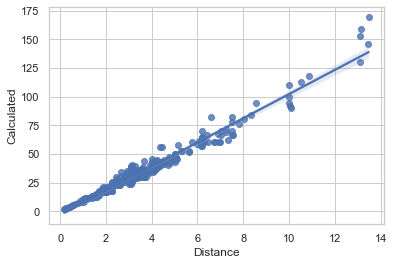

In [44]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [45]:
df.head(1)


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11,2022-05-11,Run,656,5.0,2989,9.96,1.08,6.03,55.39,146.0,7917.0,49.816667


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 658
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   488 non-null    datetime64[ns]
 1   Workout_Date     488 non-null    datetime64[ns]
 2   Activity_Type    488 non-null    object        
 3   Calories_Burned  488 non-null    int64         
 4   Distance         488 non-null    float64       
 5   Workout_Time     488 non-null    int64         
 6   Avg_Pace         488 non-null    float64       
 7   Max_Pace         488 non-null    float64       
 8   Avg_Speed        488 non-null    float64       
 9   Max_Speed        488 non-null    float64       
 10  Avg_Heart_Rate   488 non-null    float64       
 11  Steps            488 non-null    float64       
 12  Calculated       488 non-null    float64       
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 53.4+ KB


In [47]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

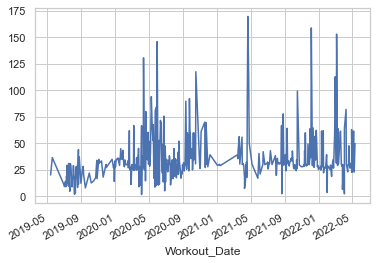

In [48]:
# show data of one subject
mask1 = df['Activity_Type'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='Workout_Date'>

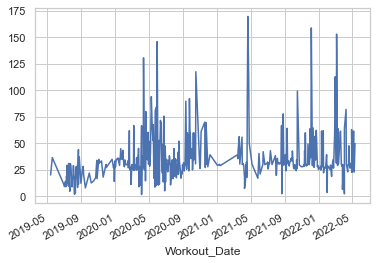

In [49]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

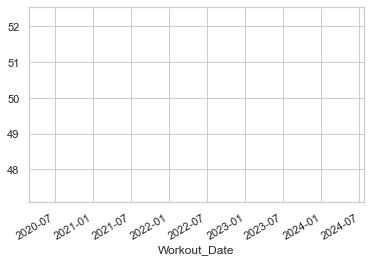

In [51]:
# check a subjects, on a particular day's data
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date == 20220511')
    ['Calculated']
    .plot()
)


In [104]:
# # get the total stepcounts of a subject each day
# def get_subject_agg_each_day(Activity_Type):
#     return (
#         df.groupby(
#             ['Activity_Type'])
#         .sum()
#         [[Activity_Type]]
#         # .plot(kind='bar')
#     )


In [52]:
# get the agg of a col
group = df.groupby(
    'Date_Submitted').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [53]:
group.head()

,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Date_Submitted,,,,,,,,,,,,
2019-08-21,4,4,4,4,4,4,4,4,4,4,4,4
2020-03-26,3,3,3,3,3,3,3,3,3,3,3,3
2020-06-26,3,3,3,3,3,3,3,3,3,3,3,3
2020-06-29,3,3,3,3,3,3,3,3,3,3,3,3
2021-09-13,3,3,3,3,3,3,3,3,3,3,3,3


### correlation matrix / Pairplot


In [54]:
df.head(2)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11,2022-05-11,Run,656,5.00,2989,9.96,1.08,6.03,55.39,146.0,7917.0,49.816667
1,2022-05-09,2022-05-09,Run,391,3.11,1802,9.66,0.94,6.21,64.11,140.0,4782.0,30.033333


In [55]:
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

### Heatmap - correlation


In [56]:
# show the correlation matrix
df.corr()


,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975330,0.972453,0.287215,-0.125555,-0.278696,0.055033,0.162761,0.966837,0.972453
Distance,0.975330,1.000000,0.982702,0.243941,-0.117924,-0.239124,0.068948,0.215664,0.985392,0.982702
Workout_Time,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000
Avg_Pace,0.287215,0.243941,0.388297,1.000000,0.062287,-0.989500,0.060845,0.169652,0.345034,0.388297
Max_Pace,-0.125555,-0.117924,-0.095049,0.062287,1.000000,-0.074986,-0.082557,0.092156,-0.122897,-0.095049
Avg_Speed,-0.278696,-0.239124,-0.377374,-0.989500,-0.074986,1.000000,-0.059262,-0.183847,-0.340619,-0.377374
Max_Speed,0.055033,0.068948,0.085442,0.060845,-0.082557,-0.059262,1.000000,0.094448,0.086298,0.085442
Avg_Heart_Rate,0.162761,0.215664,0.217432,0.169652,0.092156,-0.183847,0.094448,1.000000,0.217389,0.217432
Steps,0.966837,0.985392,0.989893,0.345034,-0.122897,-0.340619,0.086298,0.217389,1.000000,0.989893
Calculated,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000


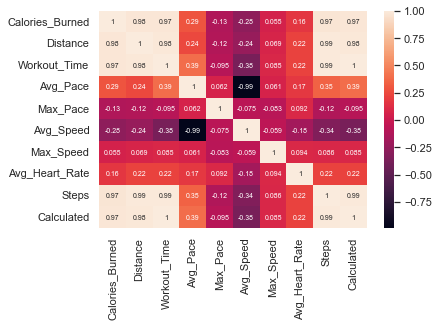

In [57]:
# show the correlation heatmap

# library
import seaborn as sns
import pandas as pd
import numpy as np

# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [129]:
# show columns
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

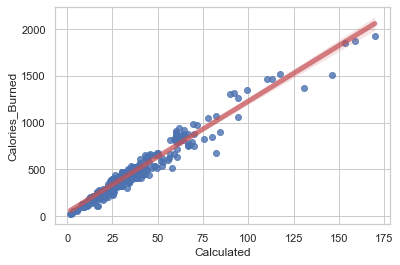

In [58]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


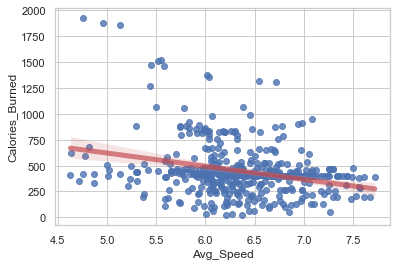

In [59]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


In [60]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

<AxesSubplot:>

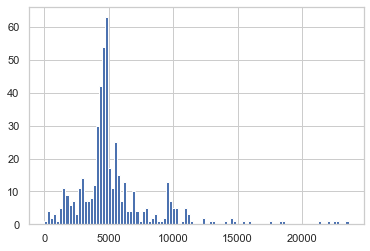

In [61]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [63]:
df2 = df[['Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps',
       'Calculated']]
df2.corr()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975330,0.972453,0.287215,-0.125555,-0.278696,0.055033,0.162761,0.966837,0.972453
Distance,0.975330,1.000000,0.982702,0.243941,-0.117924,-0.239124,0.068948,0.215664,0.985392,0.982702
Workout_Time,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000
Avg_Pace,0.287215,0.243941,0.388297,1.000000,0.062287,-0.989500,0.060845,0.169652,0.345034,0.388297
Max_Pace,-0.125555,-0.117924,-0.095049,0.062287,1.000000,-0.074986,-0.082557,0.092156,-0.122897,-0.095049
Avg_Speed,-0.278696,-0.239124,-0.377374,-0.989500,-0.074986,1.000000,-0.059262,-0.183847,-0.340619,-0.377374
Max_Speed,0.055033,0.068948,0.085442,0.060845,-0.082557,-0.059262,1.000000,0.094448,0.086298,0.085442
Avg_Heart_Rate,0.162761,0.215664,0.217432,0.169652,0.092156,-0.183847,0.094448,1.000000,0.217389,0.217432
Steps,0.966837,0.985392,0.989893,0.345034,-0.122897,-0.340619,0.086298,0.217389,1.000000,0.989893
Calculated,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000


### ML

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [64]:
from sklearn.model_selection import train_test_split

In [98]:
#Check for null values before testing/training
df2.isnull().sum()

Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Max_Pace           0
Avg_Speed          0
Max_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
dtype: int64

In [99]:
X = df2.loc[:, ['Distance']].values

In [100]:
# verify the shape of the array (rows by a single column)
X.shape

(488, 1)

In [101]:
y = df.loc[:, 'Avg_Pace'].values

In [102]:
#verify the shape of the y array
y.shape

(488,)

In [103]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [104]:
#set our fit with our arrays
reg.fit(X,y)

LinearRegression()

In [105]:
reg.predict(X[0].reshape(-1,1))

array([9.67999935])

In [106]:
reg.predict(X[0:2])

array([9.67999935, 9.47037242])

In [107]:
score = reg.score(X, y)
print(score)

0.05950704696345055


In [108]:
reg.coef_

array([0.11091372])

In [109]:
reg.intercept_

9.12543074462507

In [110]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 0.11x + 9.13


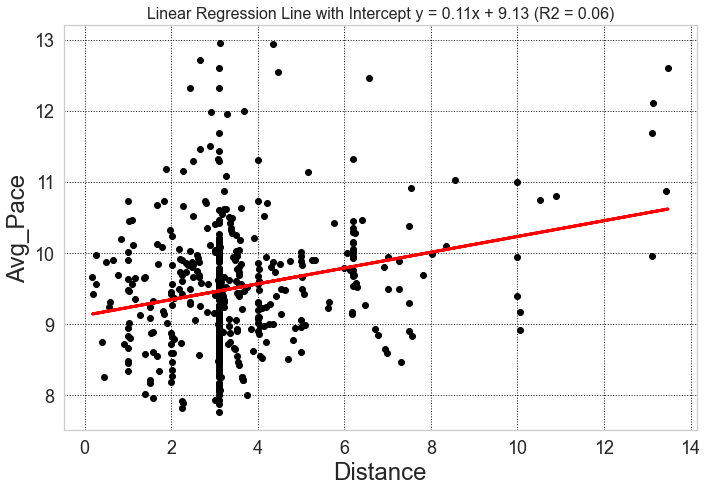

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance', fontsize = 24)
ax.set_ylabel('Avg_Pace', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [113]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

C:\Users\coleb\AppData\Local\Temp\ipykernel_14240\4145620563.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


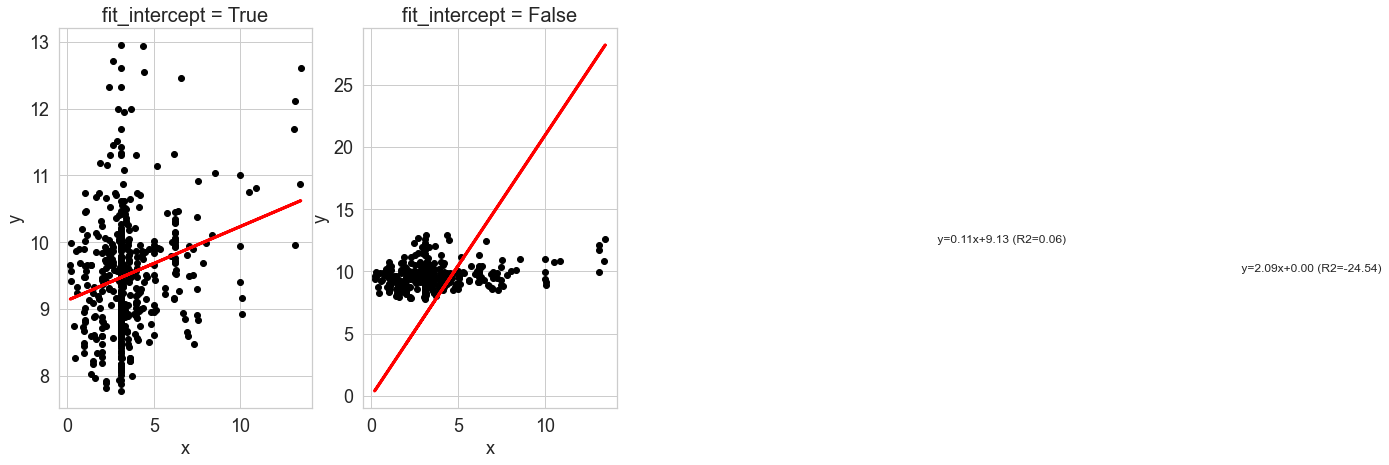

In [114]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [115]:
df2.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,656,5.00,2989,9.96,1.08,6.03,55.39,146.00,7917.0,49.816667
1,391,3.11,1802,9.66,0.94,6.21,64.11,140.00,4782.0,30.033333
2,313,2.35,1376,9.74,1.03,6.16,58.29,156.00,3622.0,22.933333
3,348,2.59,1516,9.75,0.43,6.16,140.98,154.00,4043.0,25.266667
4,430,3.10,1974,10.61,0.00,5.65,0.00,105.74,5197.0,32.900000


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df[['Distance']], df['Avg_Pace'], random_state=0)

In [117]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [118]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.04160422740581937


### Regression

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.datasets import load_wine
wine = load_wine()  
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=11)  # random_state for reproducibility

In [130]:
from sklearn.datasets import load_wine 
X_train, X_test, y_train, y_test = train_test_split(
    df2.Distance, df2.target, random_state=11)  # random_state for reproducibility

AttributeError: 'DataFrame' object has no attribute 'target'

<AxesSubplot:xlabel='Distance', ylabel='Avg_Pace'>

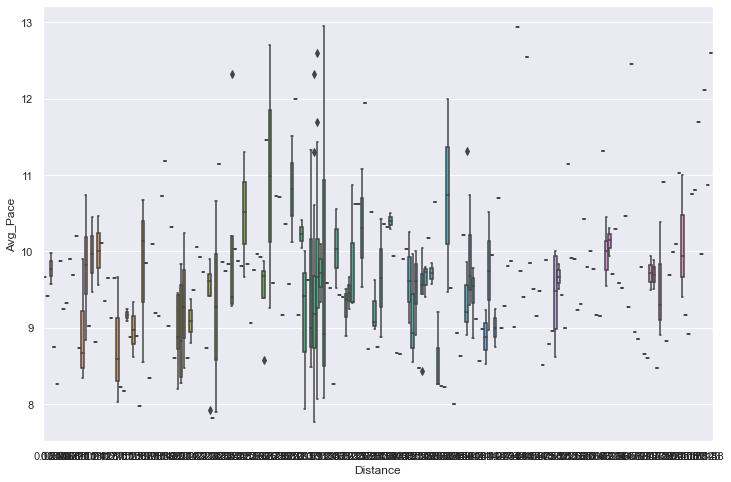

In [131]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df2)

In [132]:
dummy_variables = pd.get_dummies(df2[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

,Distance,Avg_Pace,Calories_Burned
0,5.00,9.96,656
1,3.11,9.66,391
2,2.35,9.74,313
3,2.59,9.75,348
4,3.10,10.61,430


In [142]:
from sklearn.preprocessing import MinMaxScaler 

In [143]:
num_features = df2[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [144]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

(488, 6)
(488,)


(2394,)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [147]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):1.000
R-squared score (test): 1.000


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

c:\Users\coleb\mambaforge\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R-squared score (training): 1.000
R-squared score (test): 0.994


## Pairplot

In [151]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

In [152]:
X = df.drop('Distance',axis=1)
y = df.Distance
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [154]:
y_train.value_counts()

3.10     106
3.11      15
6.20       9
4.00       7
1.00       5
        ... 
2.20       1
13.48      1
0.85       1
0.18       1
13.12      1
Name: Distance, Length: 165, dtype: int64

In [155]:
y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

NameError: name 'y_train_1' is not defined

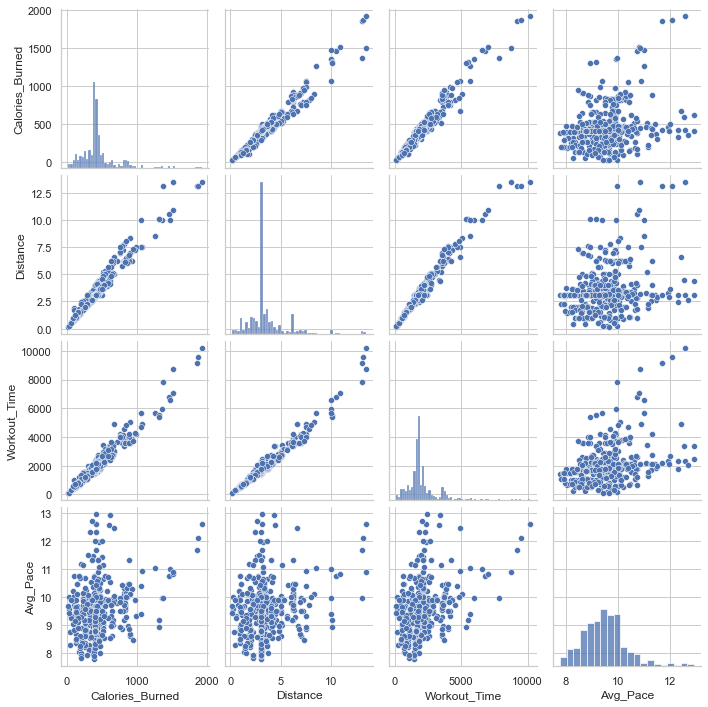

In [69]:
sns.pairplot(df2, vars = df2.columns[0:4])

In [ ]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

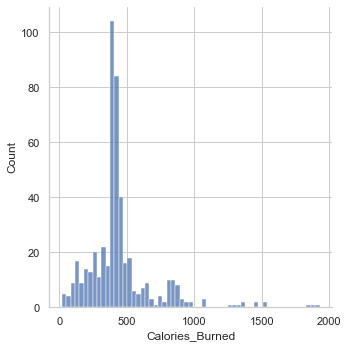

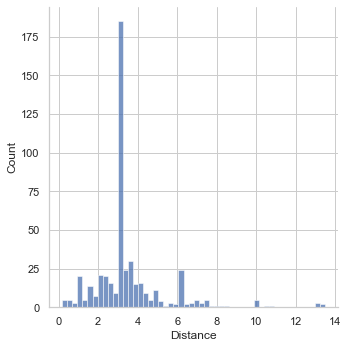

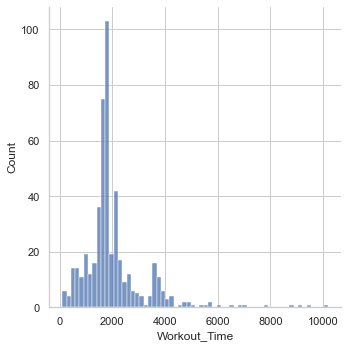

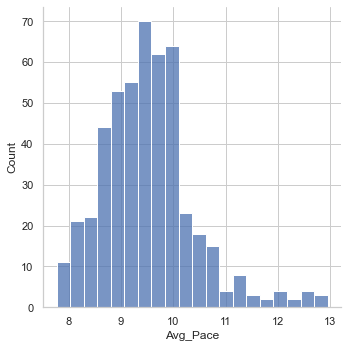

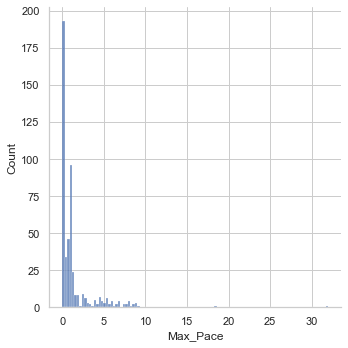

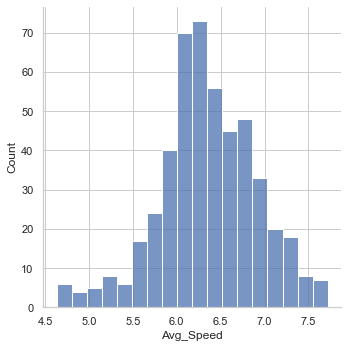

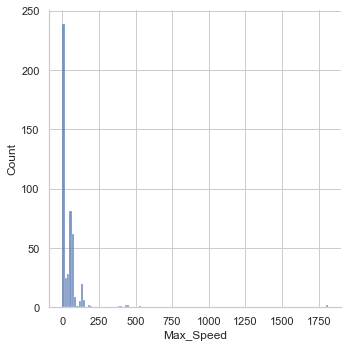

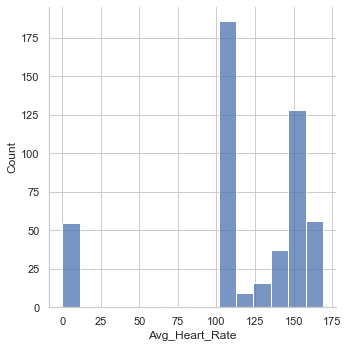

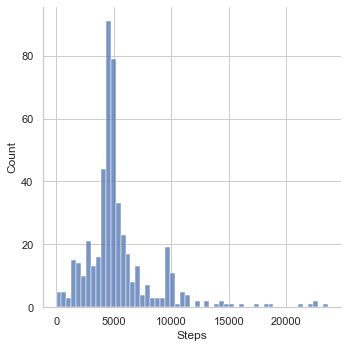

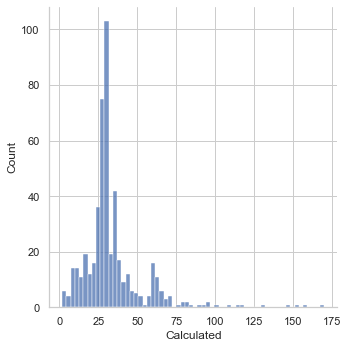

In [70]:
for column in df2:
    sns.displot(x=column, data=df2)

In [160]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

In [71]:
# Convert x column to numpy array
X = df2.loc[:, ['Calories_Burned']].values

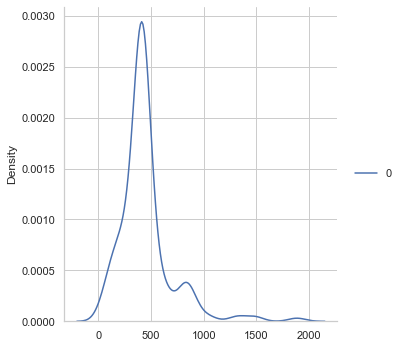

In [72]:
sns.displot(X, kind='kde')

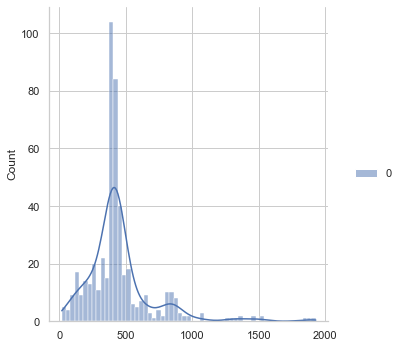

In [73]:
sns.displot(X, kde=True)

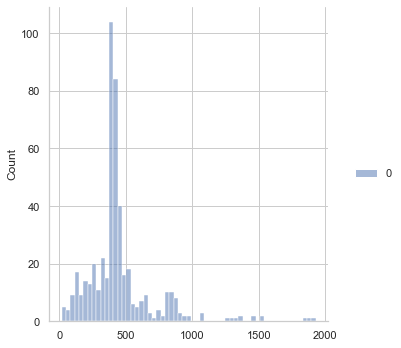

In [74]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

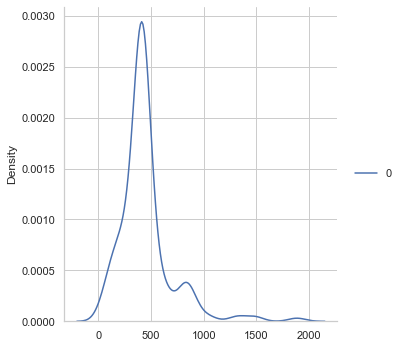

In [75]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

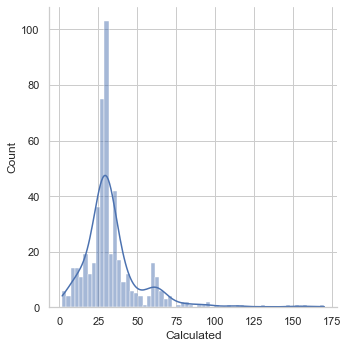

In [76]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df2, x='Calculated', kde=True)

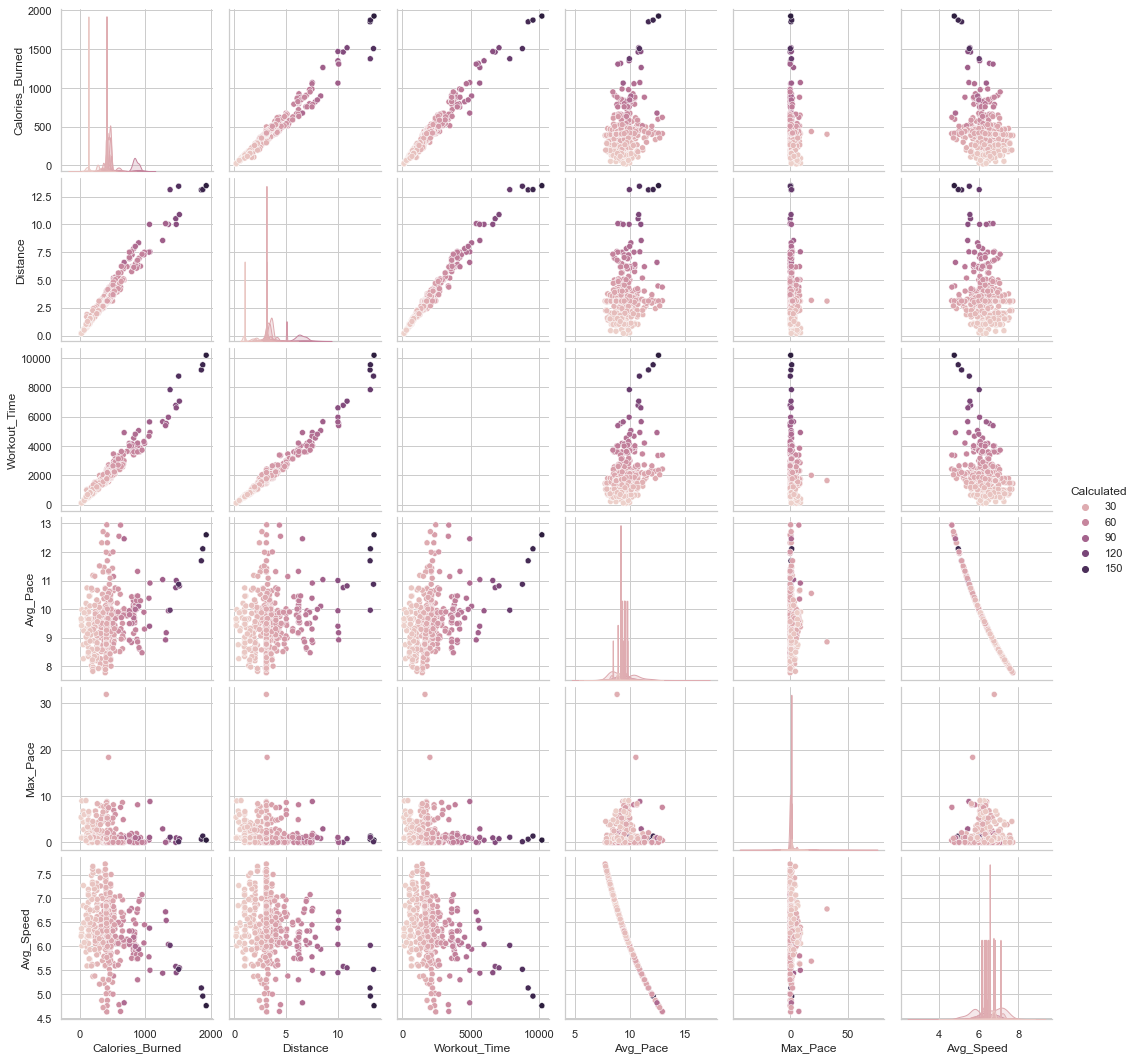

In [86]:
sns.pairplot(data = df, vars = df.columns[3:9], hue = 'Calculated')

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 658
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calories_Burned  488 non-null    int64  
 1   Distance         488 non-null    float64
 2   Workout_Time     488 non-null    int64  
 3   Avg_Pace         488 non-null    float64
 4   Max_Pace         488 non-null    float64
 5   Avg_Speed        488 non-null    float64
 6   Max_Speed        488 non-null    float64
 7   Avg_Heart_Rate   488 non-null    float64
 8   Steps            488 non-null    float64
 9   Calculated       488 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 58.1 KB
